In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wuzzuf_Jobs.csv')
X = dataset.iloc[:, :-1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('YearsExp', OneHotEncoder(),[5])],remainder='passthrough')
labelencoder_X = LabelEncoder()
X[:, 5] = labelencoder_X.fit_transform(X[:, 5])
X=pd.DataFrame(X)

dataset['YearsExp'] = pd.factorize(dataset['YearsExp'])[0]


dataset['fact'] = pd.factorize(dataset['YearsExp'])[0]







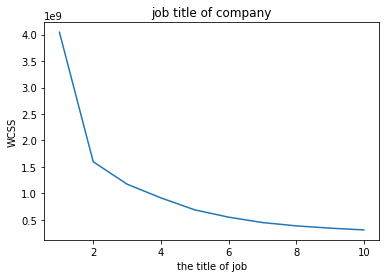

In [3]:
X = dataset.iloc[:, [0, 1]].values
x=pd.DataFrame(X)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

dataset['Title'] = pd.factorize(dataset['Title'])[0]
dataset['fact1'] = pd.factorize(dataset['Title'])[0]
ct=ColumnTransformer([('Title', OneHotEncoder(),[0])],remainder='passthrough')
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

dataset['Company'] = pd.factorize(dataset['Company'])[0]
dataset['fact2'] = pd.factorize(dataset['Company'])[0]
ct=ColumnTransformer([('Company', OneHotEncoder(),[1])],remainder='passthrough')
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])


# y = dataset.iloc[:, 3].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('job title of company')
plt.xlabel('the title of job')
plt.ylabel('WCSS')
plt.show()



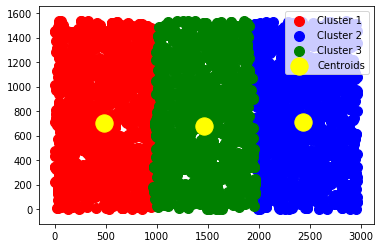

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans == 0
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()